In [118]:
!pip install pandas duckdb matplotlib seaborn

import pandas as pd
import duckdb
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np

In [119]:
file_path = '../tpc_cpu.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep=",")
else:
    raise FileNotFoundError(f"The file {file_path} does not exist.")

In [120]:
def extract_performance_id(name):
    match = re.search(r'\d{4}', name)
    if match:
        return match.group(0)[-2:]
    return None

def extract_sku_level(name):
    match = re.search(r'\d{4}', name)
    if match:
        return int(match.group(0)[0])
    return None

In [121]:
# Clean / add data
df = df[df['model'].str.contains('xeon', case=False, na=False)]
df['performance_id'] = df['model'].apply(extract_performance_id)
df['sku_level'] = df['model'].apply(extract_sku_level)
df = df[df['sku_level'] != '']
df.to_csv("../tpc_sku.csv", header=True)

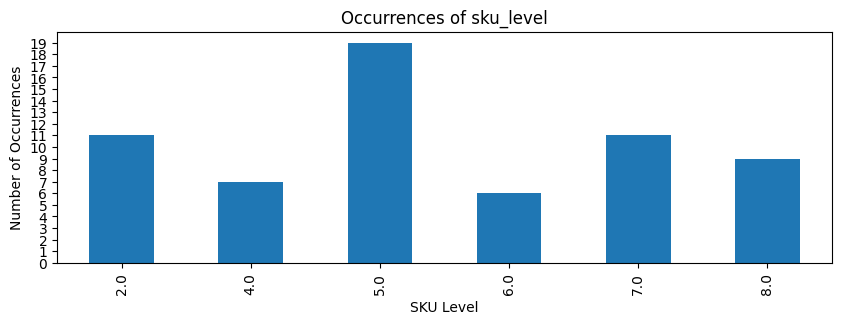

In [122]:
sku_counts = df['sku_level'].value_counts().sort_index()

# Creating the bar plot
plt.figure(figsize=(10, 3))
sku_counts.plot(kind='bar')

# Adding titles and labels
plt.title('Occurrences of sku_level')
plt.xlabel('SKU Level')
plt.ylabel('Number of Occurrences')

# Setting y-axis to show only integer values
plt.yticks(np.arange(0, sku_counts.max() + 1, 1))

# Displaying the plot
plt.show()

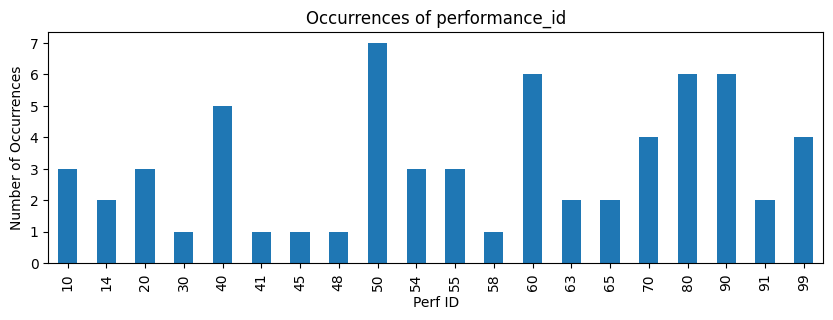

In [123]:
sku_counts = df['performance_id'].value_counts().sort_index()

# Creating the bar plot
plt.figure(figsize=(10, 3))
sku_counts.plot(kind='bar')

# Adding titles and labels
plt.title('Occurrences of performance_id')
plt.xlabel('Perf ID')
plt.ylabel('Number of Occurrences')

# Setting y-axis to show only integer values
plt.yticks(np.arange(0, sku_counts.max() + 1, 1))

# Displaying the plot
plt.show()

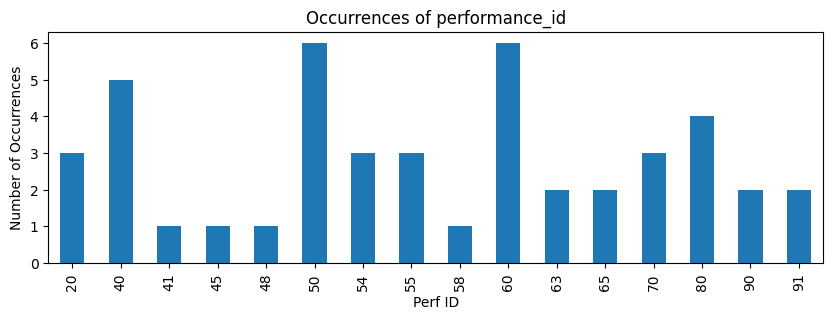

In [124]:
cpu_models = df['model']
cpu_models.to_csv("../tpc_xeon.csv")

# Filter with sku level
df = df[df['sku_level'] >= 5]

sku_counts = df['performance_id'].value_counts().sort_index()

# Creating the bar plot
plt.figure(figsize=(10, 3))
sku_counts.plot(kind='bar')

# Adding titles and labels
plt.title('Occurrences of performance_id')
plt.xlabel('Perf ID')
plt.ylabel('Number of Occurrences')

# Setting y-axis to show only integer values
plt.yticks(np.arange(0, sku_counts.max() + 1, 1))

# Displaying the plot
plt.show()

In [125]:
# con = duckdb.connect("../spec.db") # assumes DuckDB DB "spec.db" in root dir
# con.sql("DROP TABLE IF EXISTS spec")
# con.sql("CREATE TABLE spec AS SELECT * FROM df_combined")
# con.close()